In [1]:
# Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from model_helpers import eval_perform_multi_class
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
CLASS_NAMES = ["Negras", "Blancas"]

In [2]:
data_path = "./data/df_2_cod.csv"
df_original = pd.read_csv(data_path)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19108 entries, 0 to 19107
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   game_id                19108 non-null  int64 
 1   turns                  19108 non-null  int64 
 2   white_rating           19108 non-null  int64 
 3   black_rating           19108 non-null  int64 
 4   moves                  19108 non-null  object
 5   opening_moves          19108 non-null  int64 
 6   ctrld_pawn             19108 non-null  int64 
 7   ctrld_knight           19108 non-null  int64 
 8   ctrld_bishop           19108 non-null  int64 
 9   ctrld_rook             19108 non-null  int64 
 10  ctrld_queen            19108 non-null  int64 
 11  ctrld_king             19108 non-null  int64 
 12  preassure_points       19108 non-null  int64 
 13  controlled_diagonals   19108 non-null  int64 
 14  controlled_lines       19108 non-null  int64 
 15  rated_cod          

# DF conservando solo características de la posición DEL TURNO generadas a partir de las cadenas FEN de partidas históricas

In [3]:
df = df_original.copy()
y_name = "winner_cod"
# X es el dataframe eliminando la variable de salida
X = df.drop(columns=[y_name, 'game_id', 'white_rating', 'black_rating', 'moves', 'current_turn_cod', 'opening_moves', 'rated_cod', 'current_turn_cod', 'time_increment_cod', 'opening_code_cod', 'opening_fullname_cod', 'opening_shortname_cod', 'opening_variation_cod', 'moves_fen_cod'])
# Y es un array unidimensional (ravel) de la variable de salida
Y = df[y_name].ravel()
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)
X_train.columns

Index(['turns', 'ctrld_pawn', 'ctrld_knight', 'ctrld_bishop', 'ctrld_rook',
       'ctrld_queen', 'ctrld_king', 'preassure_points', 'controlled_diagonals',
       'controlled_lines'],
      dtype='object')

# Maquina de soporte vectorial

In [5]:
# Crear un clasificador SVM para clasificación con kernel lineal, polinomial y de funcion de base radial
mod_linear = svm.SVC(kernel='linear',C=1, probability=True)
mod_poly = svm.SVC(kernel='poly',degree=2,C=1, probability=True)
mod_rbf = svm.SVC(kernel='rbf',C=1,gamma='auto', probability=True)

In [6]:
# Entrenar el clasificador con los datos de entrenamiento
mod_linear.fit(X_train, Y_train)

SVC(C=1, kernel='linear', probability=True)


Performance del modelo de Prueba SVM kernel lineal características posición en turno


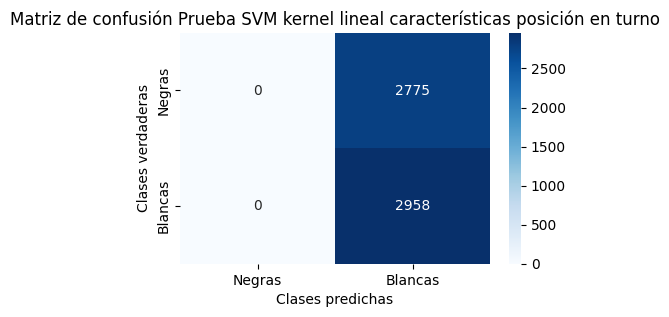

 Accu 0.5159602302459445 
 Prec 0.2662149591954481 
 Reca 0.5159602302459445

Métricas de Probabilidad:
 Brier Score: 0.25005814243711955


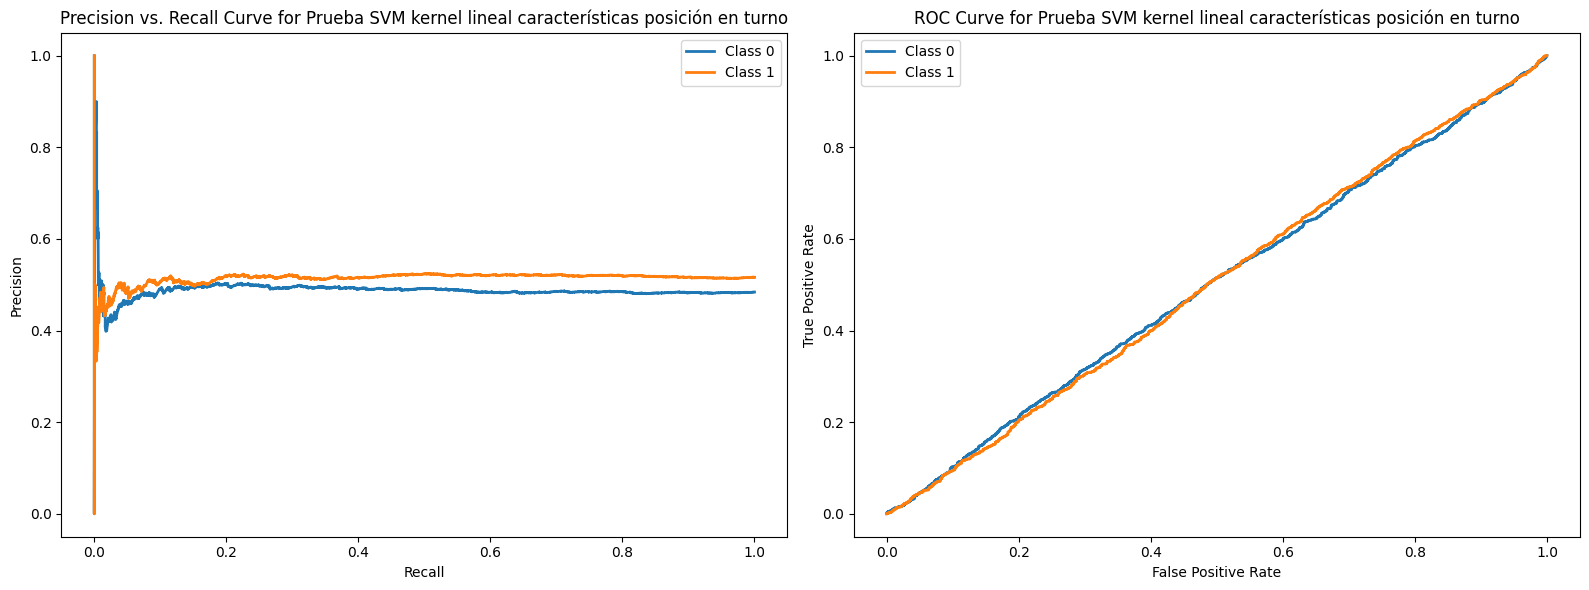


Performance del modelo de Entrenamiento SVM kernel lineal características posición en turno


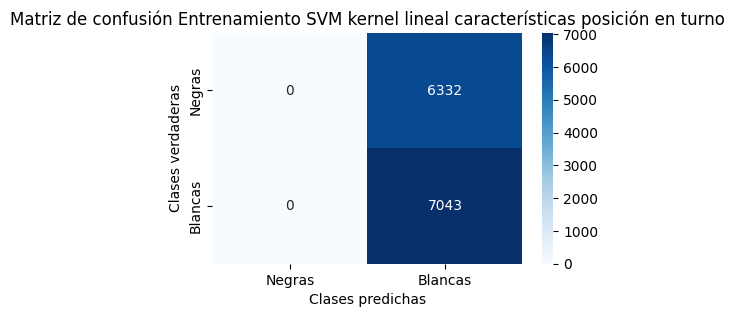

 Accu 0.5265794392523364 
 Prec 0.2772859058433051 
 Reca 0.5265794392523364

Métricas de Probabilidad:
 Brier Score: 0.24915190404512


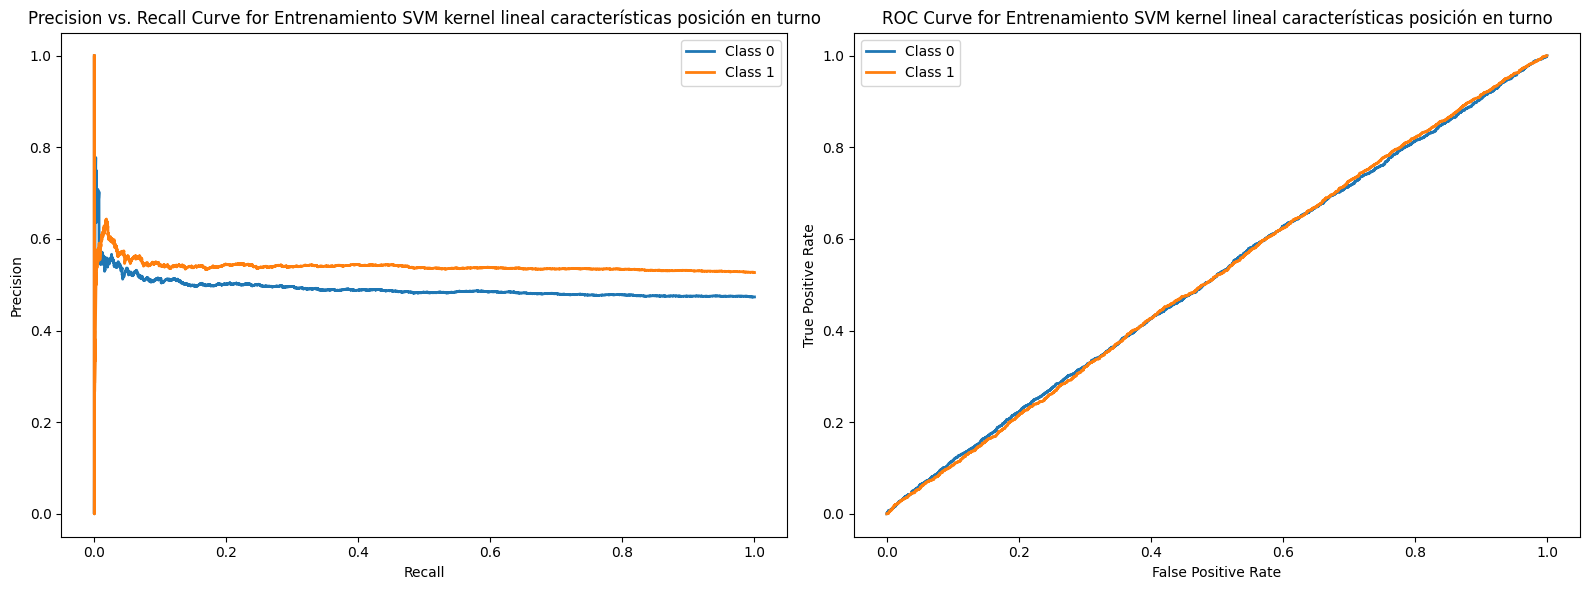

(0.5265794392523364,
 0.2772859058433051,
 0.5265794392523364,
 0.24915190404512,
 array([[   0, 6332],
        [   0, 7043]], dtype=int64))

In [7]:
# Salida Y & "hat" (ŷ) que denota predicciones estimadas.
Yhat_linear_test = mod_linear.predict(X_test)
Yhat_linear_train = mod_linear.predict(X_train)
Yhat_linear_test_prob = mod_linear.predict_proba(X_test)
Yhat_linear_train_prob = mod_linear.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_linear_test,Yhat_linear_test_prob,CLASS_NAMES,"Prueba SVM kernel lineal características posición en turno")
eval_perform_multi_class(Y_train,Yhat_linear_train,Yhat_linear_train_prob,CLASS_NAMES, "Entrenamiento SVM kernel lineal características posición en turno")

In [8]:
mod_poly.fit(X_train, Y_train)

SVC(C=1, degree=2, kernel='poly', probability=True)


Performance del modelo de Prueba SVM kernel polinomial características posición en turno


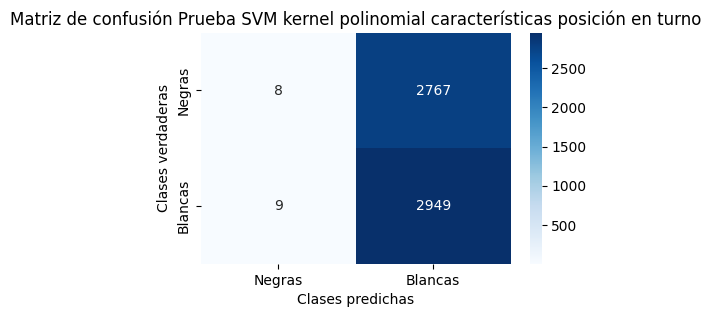

 Accu 0.5157858015000872 
 Prec 0.4939777385896491 
 Reca 0.5157858015000872

Métricas de Probabilidad:
 Brier Score: 0.24984280423779026


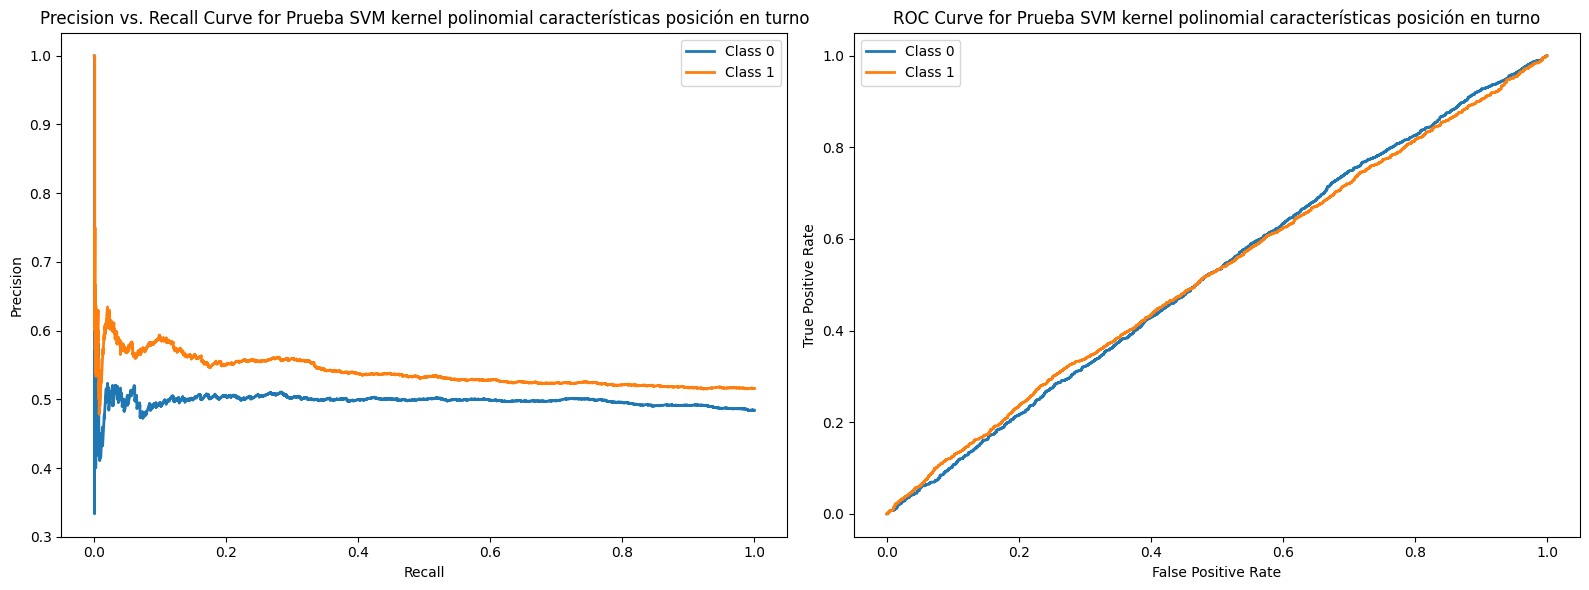


Performance del modelo de Entrenamiento SVM kernel polinomial características posición en turno


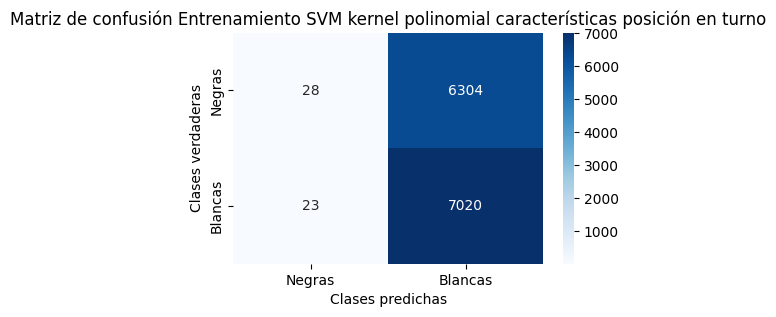

 Accu 0.5269532710280374 
 Prec 0.5373554521700099 
 Reca 0.5269532710280374

Métricas de Probabilidad:
 Brier Score: 0.24926348063749806


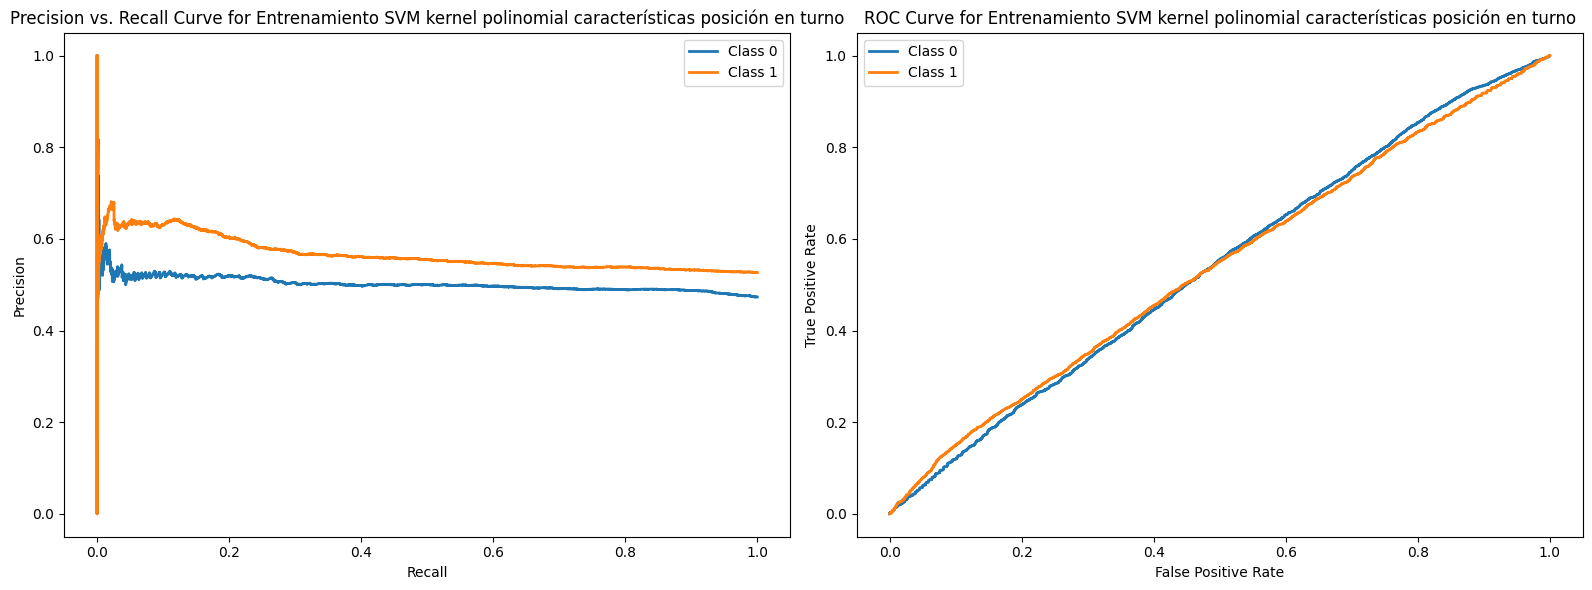

(0.5269532710280374,
 0.5373554521700099,
 0.5269532710280374,
 0.24926348063749806,
 array([[  28, 6304],
        [  23, 7020]], dtype=int64))

In [9]:
Yhat_poly_test = mod_poly.predict(X_test)
Yhat_poly_train = mod_poly.predict(X_train)
Yhat_poly_test_prob = mod_poly.predict_proba(X_test)
Yhat_poly_train_prob = mod_poly.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_poly_test, Yhat_poly_test_prob,CLASS_NAMES, "Prueba SVM kernel polinomial características posición en turno")
eval_perform_multi_class(Y_train,Yhat_poly_train, Yhat_poly_train_prob,CLASS_NAMES, "Entrenamiento SVM kernel polinomial características posición en turno")

In [10]:
mod_rbf.fit(X_train, Y_train)

SVC(C=1, gamma='auto', probability=True)


Performance del modelo de Prueba SVM kernel rbf características posición en turno


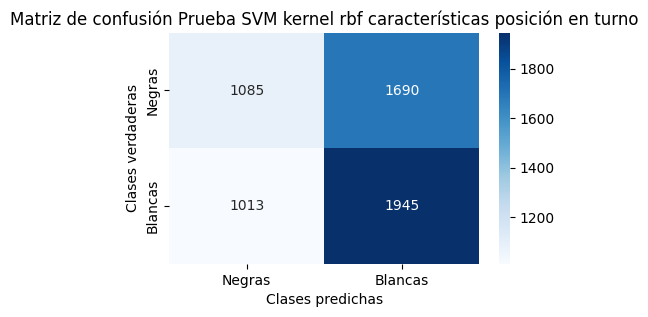

 Accu 0.5285190999476713 
 Prec 0.5264033770368393 
 Reca 0.5285190999476713

Métricas de Probabilidad:
 Brier Score: 0.24920621143272617


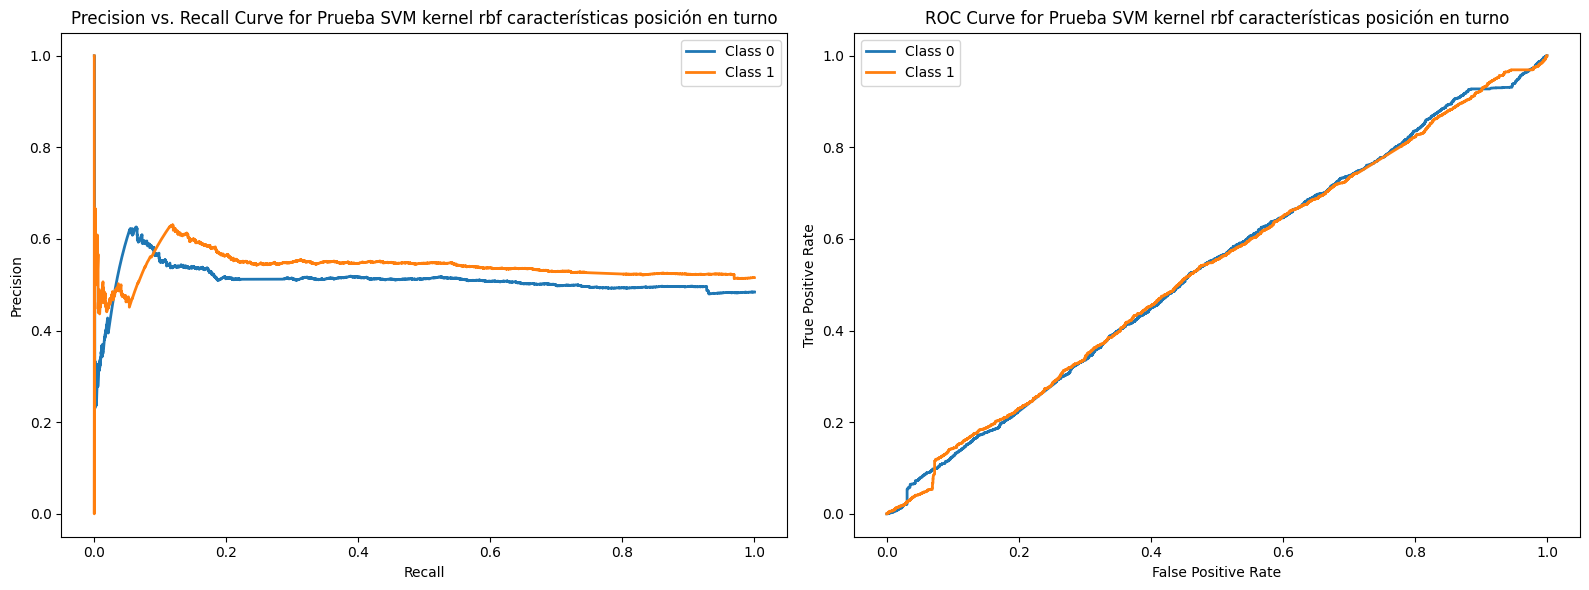


Performance del modelo de Entrenamiento SVM kernel rbf características posición en turno


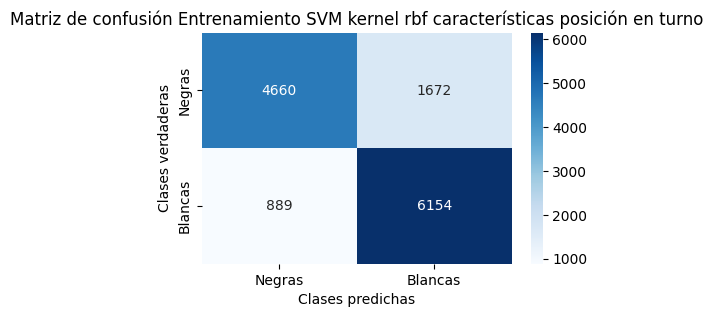

 Accu 0.8085233644859813 
 Prec 0.81165172150884 
 Reca 0.8085233644859813

Métricas de Probabilidad:
 Brier Score: 0.2154539296333296


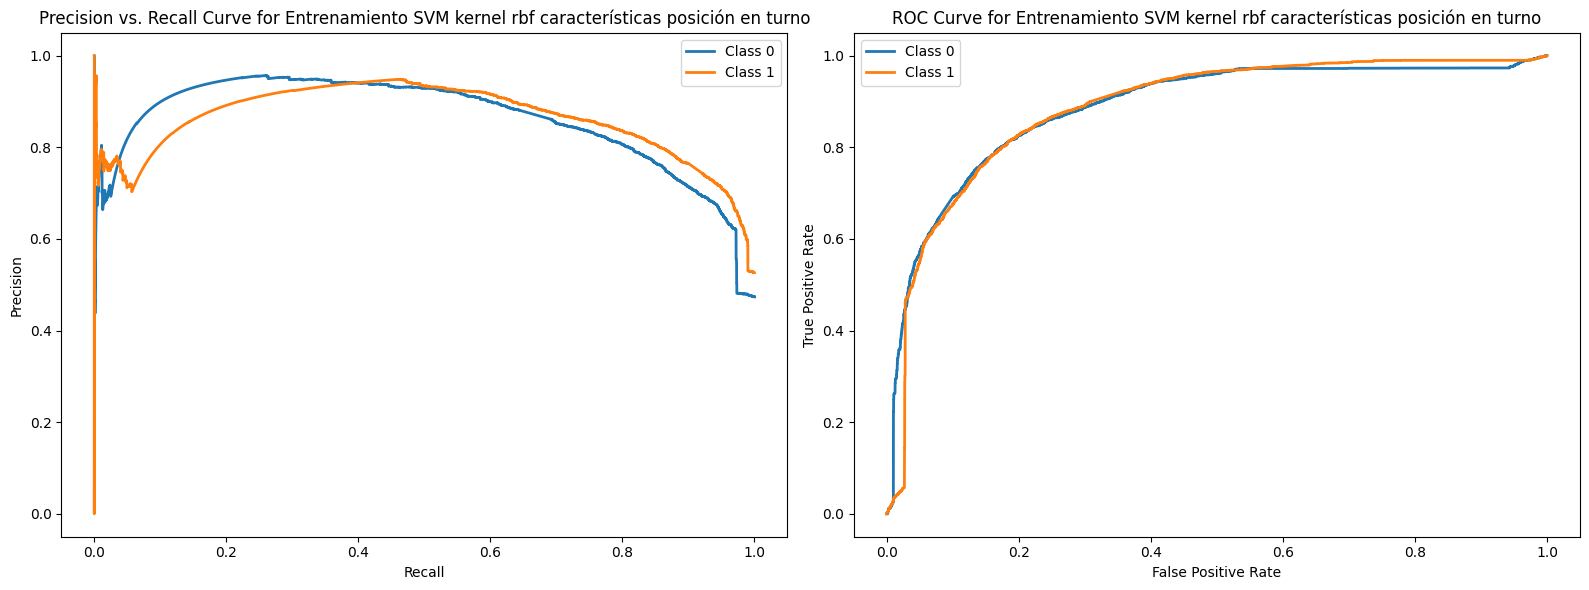

(0.8085233644859813,
 0.81165172150884,
 0.8085233644859813,
 0.2154539296333296,
 array([[4660, 1672],
        [ 889, 6154]], dtype=int64))

In [11]:
Yhat_rbf_test = mod_rbf.predict(X_test)
Yhat_rbf_train = mod_rbf.predict(X_train)
Yhat_rbf_test_prob = mod_rbf.predict_proba(X_test)
Yhat_rbf_train_prob = mod_rbf.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_rbf_test, Yhat_rbf_test_prob,CLASS_NAMES,"Prueba SVM kernel rbf características posición en turno")
eval_perform_multi_class(Y_train,Yhat_rbf_train, Yhat_rbf_train_prob,CLASS_NAMES,"Entrenamiento SVM kernel rbf características posición en turno")

# XGboost

In [12]:
import xgboost as xgb
# Crear un clasificador XGBoost
xgboost = xgb.XGBClassifier()

In [13]:
# Entrenar el modelo en los datos de entrenamiento
xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Performance del modelo de Prueba Xgboost características posición en turno


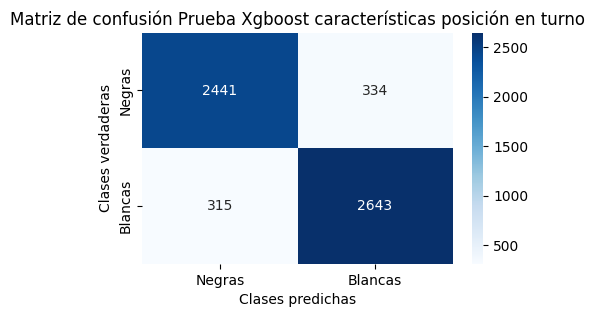

 Accu 0.886795743938601 
 Prec 0.8867887756218055 
 Reca 0.886795743938601

Métricas de Probabilidad:
 Brier Score: 0.08888465711746266


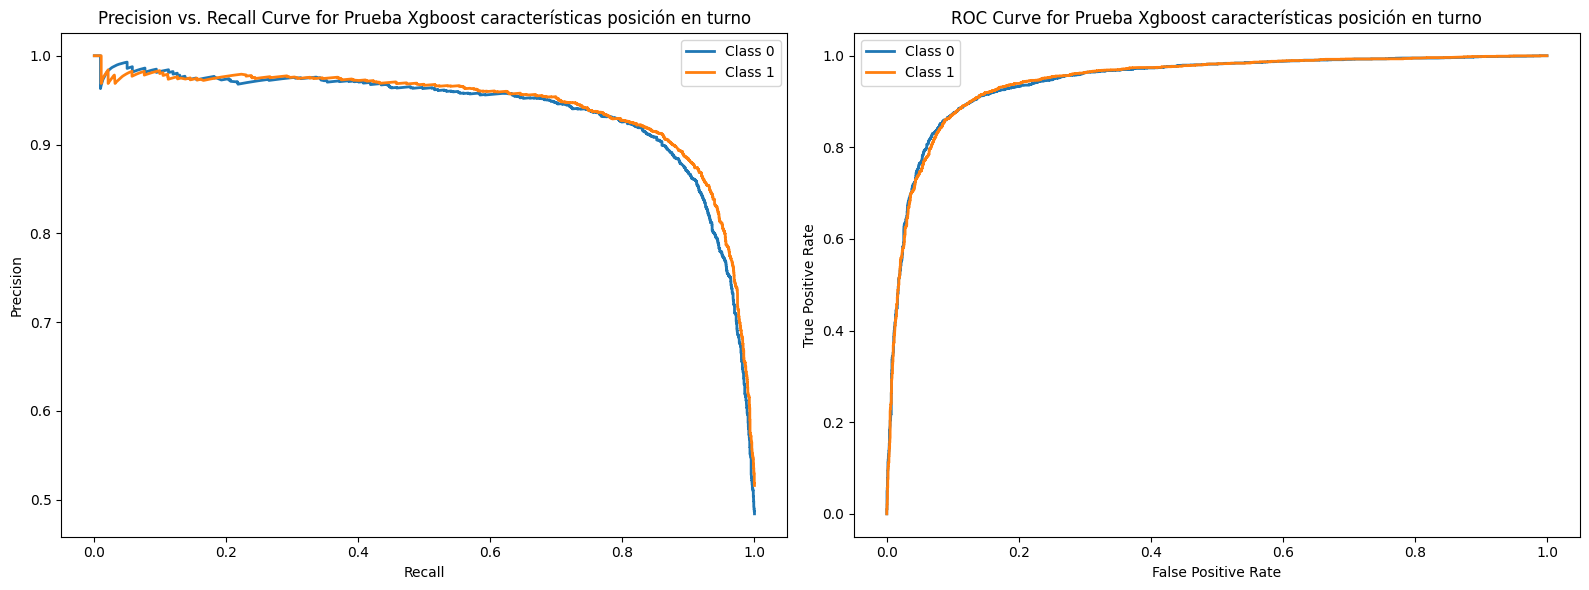


Performance del modelo de Entrenamiento Xgboost características posición en turno


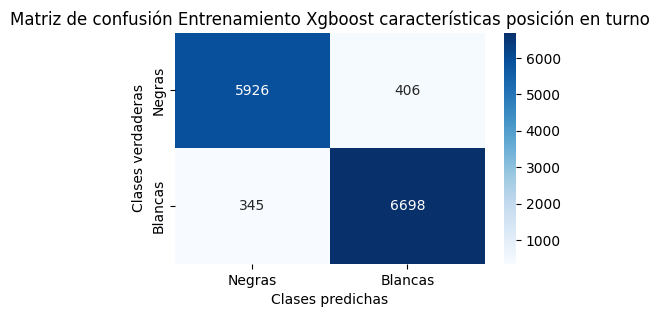

 Accu 0.9438504672897197 
 Prec 0.9438602079147599 
 Reca 0.9438504672897197

Métricas de Probabilidad:
 Brier Score: 0.05274990084249394


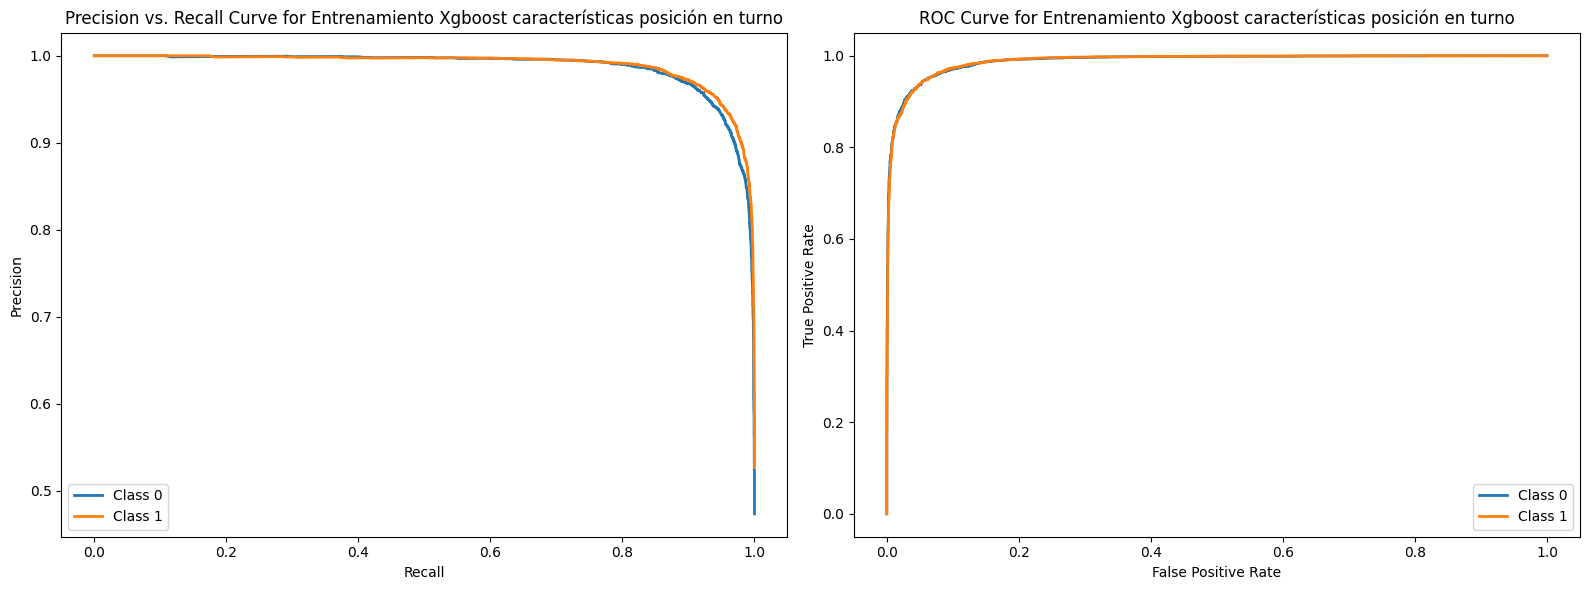

(0.9438504672897197,
 0.9438602079147599,
 0.9438504672897197,
 0.05274990084249394,
 array([[5926,  406],
        [ 345, 6698]], dtype=int64))

In [14]:
Yhat_xgboost_test = xgboost.predict(X_test)
Yhat_xgboost_train = xgboost.predict(X_train)
Yhat_xgboost_test_prob = xgboost.predict_proba(X_test)
Yhat_xgboost_train_prob = xgboost.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_xgboost_test, Yhat_xgboost_test_prob,CLASS_NAMES,"Prueba Xgboost características posición en turno")
eval_perform_multi_class(Y_train,Yhat_xgboost_train, Yhat_xgboost_train_prob,CLASS_NAMES,"Entrenamiento Xgboost características posición en turno")

# LightGBM

In [15]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 7043, number of negative: 6332
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 13375, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.526579 -> initscore=0.106418
[LightGBM] [Info] Start training from score 0.106418


LGBMClassifier()


Performance del modelo de Prueba LightGBM características posición en turno


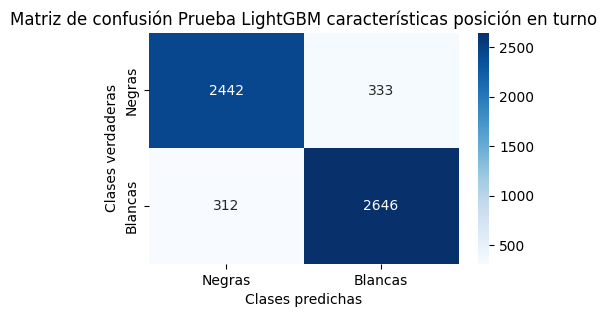

 Accu 0.8874934589220304 
 Prec 0.8874879377388538 
 Reca 0.8874934589220304

Métricas de Probabilidad:
 Brier Score: 0.1028081033078204


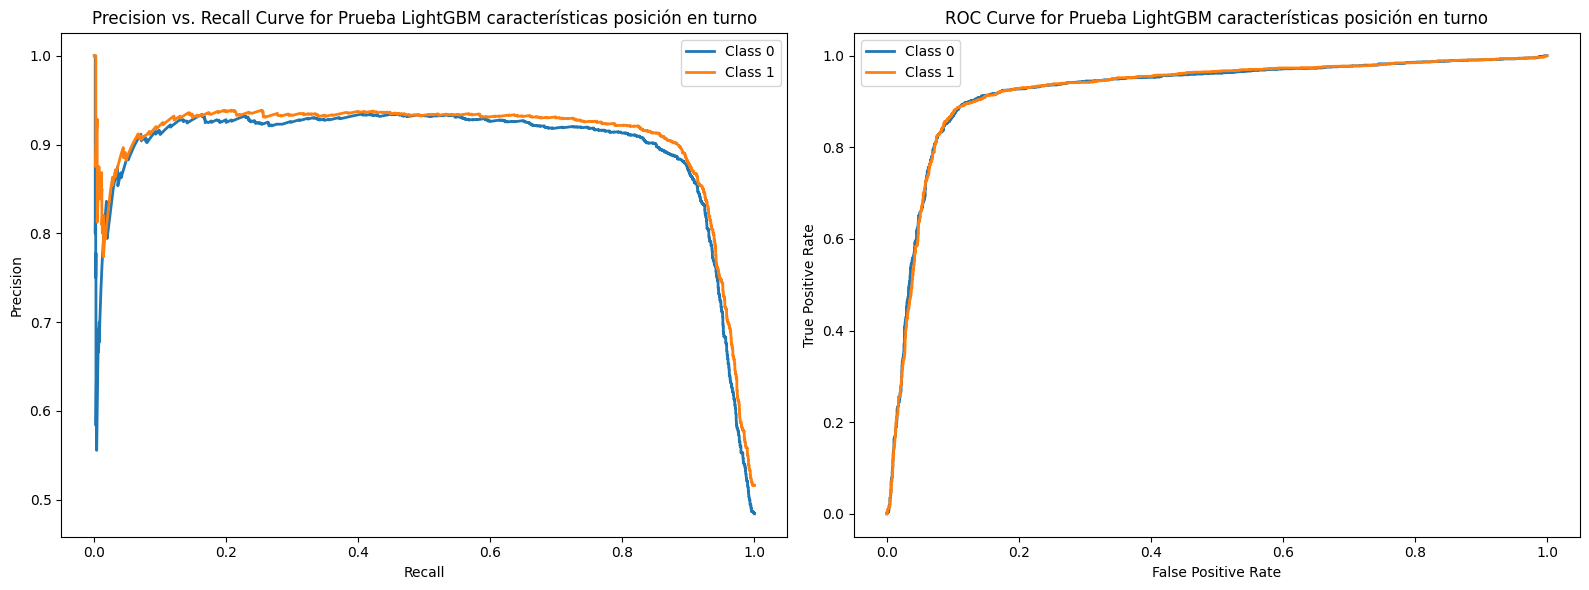


Performance del modelo de Entrenamiento LightGBM características posición en turno


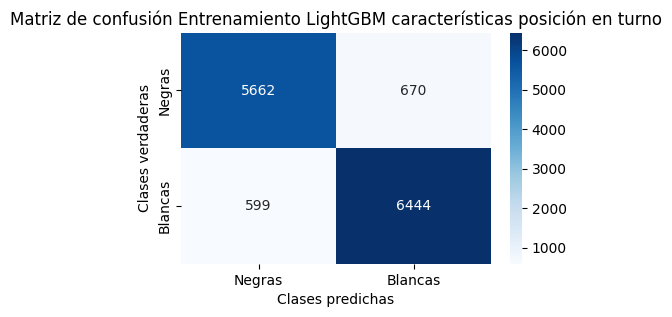

 Accu 0.9051214953271028 
 Prec 0.9051135798023847 
 Reca 0.9051214953271028

Métricas de Probabilidad:
 Brier Score: 0.08562157820988829


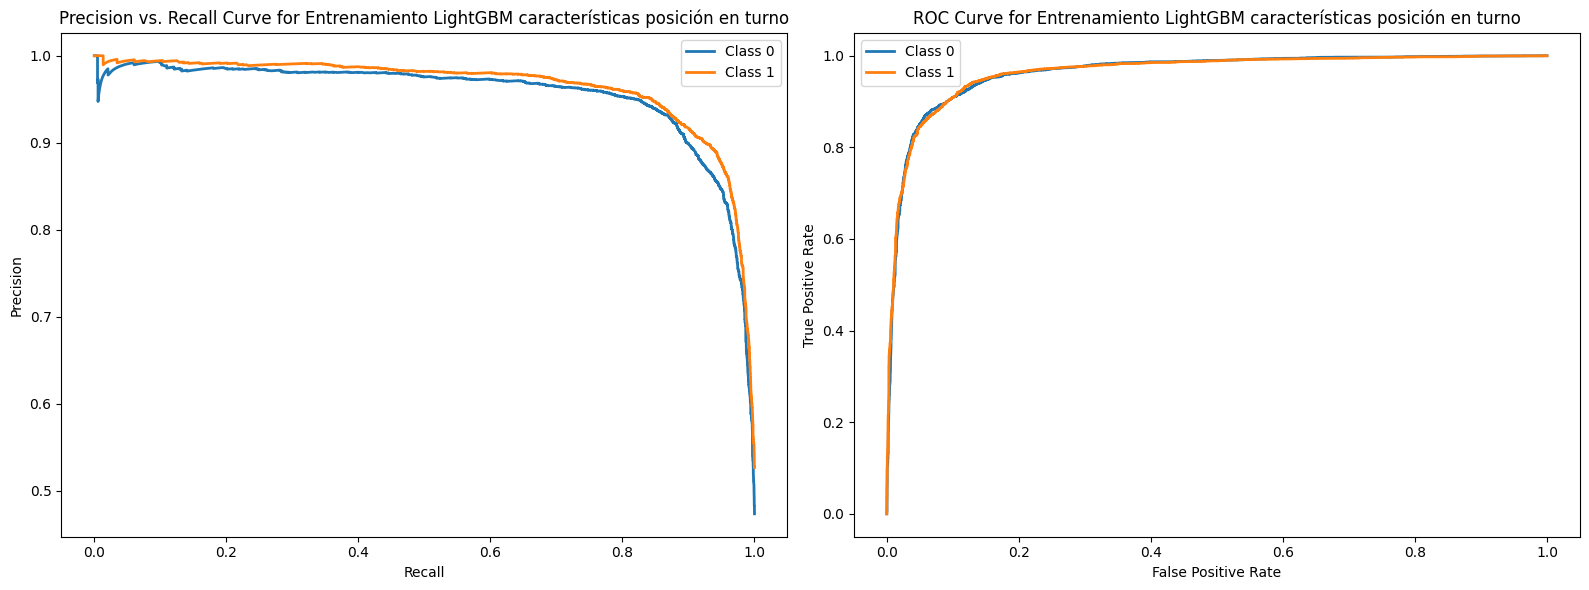

(0.9051214953271028,
 0.9051135798023847,
 0.9051214953271028,
 0.08562157820988829,
 array([[5662,  670],
        [ 599, 6444]], dtype=int64))

In [16]:
Yhat_lgbm_test = lgbm.predict(X_test)
Yhat_lgbm_train = lgbm.predict(X_train)
Yhat_lgbm_test_prob = lgbm.predict_proba(X_test)
Yhat_lgbm_train_prob = lgbm.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_lgbm_test,Yhat_lgbm_test_prob, CLASS_NAMES, "Prueba LightGBM características posición en turno")
eval_perform_multi_class(Y_train,Yhat_lgbm_train,Yhat_lgbm_train_prob, CLASS_NAMES,"Entrenamiento LightGBM características posición en turno")